In [2]:
import json
from pprint import pprint
from pathlib import Path

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uproot
from scipy.stats import bootstrap, norm

In [27]:
from gsfanalysis.pandas_import import uproot_to_pandas
from gsfanalysis.core_tail_utils import rms

In [5]:
input_dir = Path("../output/n10K_part1K/")

In [8]:
summary_long = uproot_to_pandas(uproot.open(str(input_dir / "root/tracksummary_gsf.root:tracksummary")))
len(summary_long)

9946334

In [16]:
def plot(dist, sample_mean, standard_error, stat, confidence_interval=None, confidence_level=None):
    x = np.linspace(sample_mean + 4*standard_error, sample_mean - 4*standard_error)
    pdf = norm.pdf(x, loc=sample_mean, scale=standard_error)

    fig, ax = plt.subplots()
    ax.hist(dist, bins=25, density=True)
    ax.plot(x, pdf, label="µ={:.2f}, σ={:.4f}".format(sample_mean, standard_error), lw=5)
    ax.set_xlabel(stat.__name__)
    ax.set_ylabel('pdf')
    
    ymax = ax.get_ylim()[1]

    ax.vlines([sample_mean], ymin=0, ymax=ymax, color="tab:orange", lw=3, label="mean {:.3f}".format(sample_mean))
    ax.vlines([sample_mean + standard_error, sample_mean - standard_error], ymin=0, ymax=ymax, color="tab:orange", ls="--", label="standard error {:.3f}".format(standard_error))
    
    if not (confidence_interval is None or confidence_level is None):
        ax.vlines(confidence_interval, ymin=0, ymax=ymax, color="tab:orange", ls=":", label="confidence interval {:.1%}".format(confidence_level))
        
    ax.set_ylim(0, ax.get_ylim()[1]*1.3)

    ax.legend()

In [20]:
summary_short = summary_long[:3000]

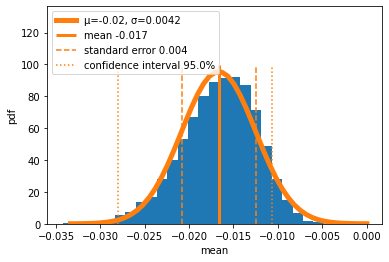

In [22]:
res = bootstrap((summary_short["res_eQOP_fit"].to_numpy(),), np.mean, confidence_level=0.95)
sample_mean = np.mean(summary_short["res_eQOP_fit"])
plot(res.bootstrap_distribution, sample_mean, res.standard_error, np.mean, res.confidence_interval, 0.95)

In [25]:
np.std(summary_short["res_eQOP_fit"]) / np.sqrt(len(summary_short))

0.004212203861006494

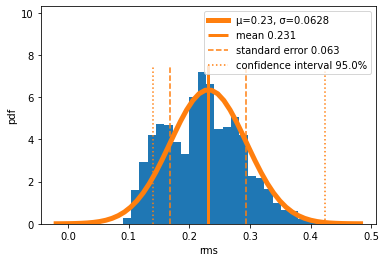

In [29]:
res = bootstrap((summary_short["res_eQOP_fit"].to_numpy(),), rms, confidence_level=0.95)
sample_mean = rms(summary_short["res_eQOP_fit"])
plot(res.bootstrap_distribution, sample_mean, res.standard_error, rms, res.confidence_interval, 0.95)